# WeatherPy
----

**Analyisis**
1.	Temperature seems to have a clear correlation with latitude
2.  There is no strong relationship between latitude and cloudiness
3.  There is no strong relationship between latitude and wind speed. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
# Import API key
from config import api_key

# added citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

# Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'

#create list to for data
weather_data = []
num = 1
units = 'imperial'

print('Begin Data Gathering')
print('-' * 20)
for city in cities:
    query_url = f'{url}appid={api_key}&q={city}&units={units}'
    weather_response = requests.get(query_url).json()
    try:
        city_name = weather_response['name']
        country = weather_response['sys']['country']
        lat = weather_response['coord']['lat']
        lng = weather_response['coord']['lon']
        temp =  weather_response['main']['temp_max']
        humidity = weather_response['main']['humidity']
        clouds = weather_response['clouds']['all']
        wind_speed = weather_response['wind']['speed']
        date = weather_response['dt'] 
        city_data = {'City': city_name, 'Country': country, 'Lat': lat
                       , 'Lng': lng, 'Max Temp (F)': temp, 'Cloudiness': clouds
                       , 'Date': date, 'Humidity': humidity, 'Wind Speed Mph': wind_speed}
        weather_data.append(city_data)        
        print(f'Processing Record {num}------{city_name}')
        num += 1
    
    except(KeyError):
        print('City Not Found!')

    
        

Begin Data Gathering
--------------------
Processing Record 1------Avarua
Processing Record 2------Karratha
Processing Record 3------George Town
Processing Record 4------Butaritari
Processing Record 5------Hilo
Processing Record 6------Torbay
Processing Record 7------New Norfolk
Processing Record 8------Atar
City Not Found!
Processing Record 9------Rikitea
Processing Record 10------Moerai
Processing Record 11------Hobart
Processing Record 12------Bluff
Processing Record 13------Severo-Kuril'sk
Processing Record 14------Viedma
Processing Record 15------Cockburn Town
Processing Record 16------Saint-Philippe
Processing Record 17------Wattegama
Processing Record 18------Coolum Beach
Processing Record 19------Puerto Ayora
Processing Record 20------Carnarvon
Processing Record 21------Takoradze
Processing Record 22------Pasni
Processing Record 23------Leshukonskoye
Processing Record 24------Nikolskoye
Processing Record 25------Moose Factory
Processing Record 26------Shenjiamen
Processing Reco

Processing Record 220------Mitsamiouli
Processing Record 221------Mindelo
Processing Record 222------Tuy Hoa
Processing Record 223------Noumea
Processing Record 224------Esim
City Not Found!
Processing Record 225------Lakes Entrance
Processing Record 226------Povolzhskiy
Processing Record 227------La Rioja
Processing Record 228------Chernitsyno
Processing Record 229------Wuxue
Processing Record 230------Ucluelet
Processing Record 231------Lüderitz
Processing Record 232------Poum
Processing Record 233------Hambantota
Processing Record 234------Stralsund
Processing Record 235------Chanthaburi
Processing Record 236------Cruzeiro do Sul
Processing Record 237------Pargolovo
Processing Record 238------Port Blair
Processing Record 239------Santa Ana
Processing Record 240------Ozuluama de Mascareñas
Processing Record 241------Kang
Processing Record 242------Ekhabi
Processing Record 243------Srednekolymsk
Processing Record 244------Tiksi
Processing Record 245------Tuktoyaktuk
Processing Record 

Processing Record 436------Esna
Processing Record 437------Ust-Nera
Processing Record 438------Collie
Processing Record 439------Kavieng
Processing Record 440------Oyem
Processing Record 441------Karaj
Processing Record 442------Bemidji
Processing Record 443------Skibotn
City Not Found!
Processing Record 444------Kontagora
Processing Record 445------Bom Jesus
Processing Record 446------Joshīmath
Processing Record 447------Polyarny
Processing Record 448------Copiapó
Processing Record 449------San Blas
Processing Record 450------Penzance
Processing Record 451------Talnakh
Processing Record 452------Canas
Processing Record 453------Paraopeba
Processing Record 454------Nago
Processing Record 455------Eilat
Processing Record 456------Pāsighāt
City Not Found!
Processing Record 457------Kysyl-Syr
Processing Record 458------Gaya
Processing Record 459------Buta
Processing Record 460------São João da Barra
City Not Found!
Processing Record 461------Yar-Sale
Processing Record 462------Neuquén
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_df = pd.DataFrame(weather_data)
weather_df

,City,Country,Lat,Lng,Max Temp (F),Cloudiness,Date,Humidity,Wind Speed Mph
0,Avarua,CK,-21.2078,-159.7750,73.45,75,1666726322,73,8.05
1,Karratha,AU,-20.7377,116.8463,74.41,0,1666726323,30,9.06
2,George Town,MY,5.4112,100.3354,78.24,20,1666726119,93,1.14
3,Butaritari,KI,3.0707,172.7902,81.05,42,1666726324,77,3.09
4,Hilo,US,19.7297,-155.0900,84.11,20,1666726258,68,4.61
...,...,...,...,...,...,...,...,...,...
561,Port Moresby,PG,-9.4431,147.1797,78.22,40,1666726527,89,3.44
562,Cuamba,MZ,-14.8031,36.5372,81.39,88,1666726528,30,3.24
563,Nouadhibou,MR,20.9310,-17.0347,71.58,2,1666726528,83,13.80
564,Corinth,GR,37.9407,22.9573,69.49,7,1666726528,57,1.16


In [8]:
weather_df.to_csv('../output_data/cities.csv')


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
humidity_data = weather_df[weather_df['Humidity']>100]
humidity_data
# No humity above 100 shown.  Note:  could have done it from above .df

,City,Country,Lat,Lng,Max Temp (F),Cloudiness,Date,Humidity,Wind Speed Mph


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

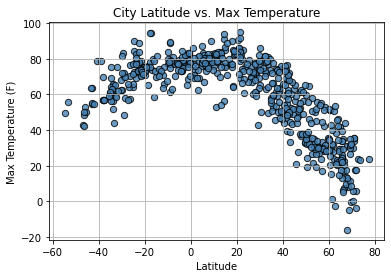

In [11]:
lat_temp_plot = weather_df.plot(kind='scatter', x="Lat", y='Max Temp (F)',grid=True, figsize=(6,4), c='steelblue', edgecolors = 'black', 
                               s=40, alpha=0.8, title='City Latitude vs. Max Temperature')
lat_temp_plot.set_xlabel('Latitude')
lat_temp_plot.set_ylabel('Max Temperature (F)')
output_file = ("../output_data/latvstemp.png")
plt.savefig(output_file)
plt.show()

## Latitude vs. Humidity Plot

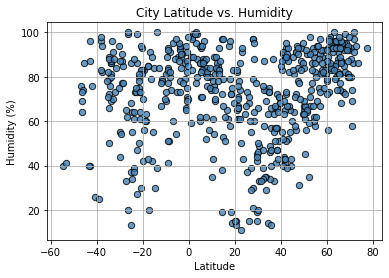

In [12]:
lat_humdity_plot = weather_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True,figsize=(6,4), c='steelblue', edgecolors = 'black', s=40, alpha=0.8,
              title='City Latitude vs. Humidity')
lat_humdity_plot.set_xlabel('Latitude')
lat_humdity_plot.set_ylabel('Humidity (%)')
output_file2 = ('../output_data/latvshumi.png')
plt.savefig(output_file2)
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
lat_cloudiness_plot = weather_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,4), c="steelblue", edgecolors = "black", s=40, alpha=0.8,
              title="Latitude vs. Cloudiness")
lat_cloudiness_plot.set_xlabel("Latitude")
lat_cloudiness_plot.set_ylabel("Cloudiness (%)")
output_file3 = ("../output_data/latvscloud.png")
plt.savefig(output_file3)
plt.show()

## Latitude vs. Wind Speed Plot

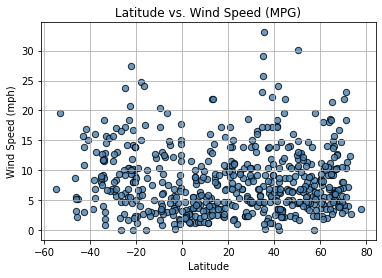

In [13]:
lat_wind_speed_plot = weather_df.plot(kind='scatter', x='Lat', y='Wind Speed Mph', grid=True, figsize=(6,4), edgecolors = 'black', s=40, c='steelblue', alpha=0.8,
              title='Latitude vs. Wind Speed (MPG)')
lat_wind_speed_plot.set_xlabel('Latitude')
lat_wind_speed_plot.set_ylabel("Wind Speed (mph)")
output_file4 = ('../output_data/latvswind.png')
plt.savefig(output_file4)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
weather_df

In [ ]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (10.24.2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the closer a city is to the equator the warmer the maximum temperature is.**

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.657815792215502
 Linear Equation is : y = 0.5x + 81.41


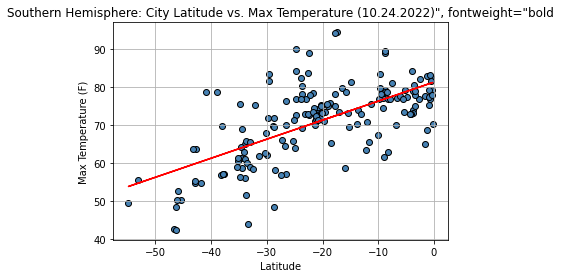

In [14]:
x_values = weather_df.loc[weather_df['Lat'] < 0,'Lat']
y_values = weather_df.loc[weather_df['Lat'] < 0, 'Max Temp (F)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, color='steelblue', edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-30, 35),fontsize=15,color='red')
plt.grid()            

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature (10.24.2022)", fontweight="bold')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')

plt.show()

- **From the above graph, the farther a city is from the equator the cooler the maximum temperature is.**

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24291167075906758
 Linear Equation is : y = 0.24x + 63.41


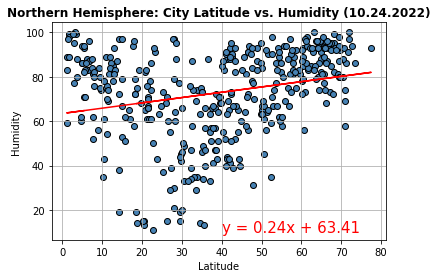

In [21]:
x_values = weather_df.loc[weather_df['Lat'] >= 0,'Lat']
y_values = weather_df.loc[weather_df['Lat'] >= 0, 'Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color='steelblue', edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(40,10),fontsize=15,color='red')
plt.grid()

plt.title('Northern Hemisphere: City Latitude vs. Humidity (10.24.2022)', fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')
plt.show()

- **From the above graph, the r-value can only explain 31% of the data. More testing is needed to determine any correlations.**

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18315184248247426
 Linear Equation is : y = 0.27x + 78.31


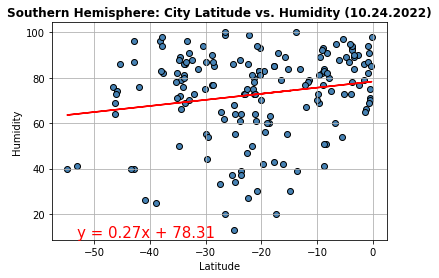

In [27]:
x_values = weather_df.loc[weather_df['Lat'] < 0,'Lat']
y_values = weather_df.loc[weather_df['Lat'] < 0, 'Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, color='steelblue', edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-53,10),fontsize=15,color='red')
plt.grid()

plt.title('Southern Hemisphere: City Latitude vs. Humidity (10.24.2022)', fontweight = 'bold')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')
plt.show()

- **From the above graph, the r-value can only explain 31% of the data. More testing is needed to determine any correlations.**

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
x_values = weather_df.loc[weather_df["Lat"] >= 0,"Lat"]
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = "black")
plt.plot(x_values,regress_values, color="r")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.grid()

plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (%) (10.24.2022)", fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-value is: {rvalue}")
print(f" Linear Equation is : {line_eq}")
plt.show()

- **From the above graph, the r-value can only explain 98% of the data. Appears to be a correlation between cloudiness of a city and how far away from the equator.**

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14792700802360362
 Linear Equation is : y = 0.43x + 69.15


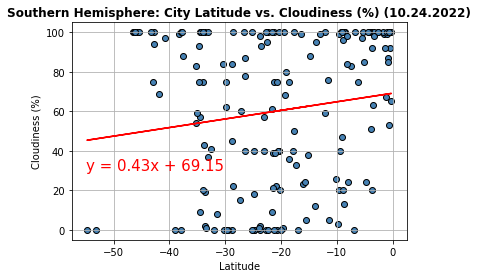

In [30]:
x_values = weather_df.loc[weather_df['Lat'] < 0,'Lat']
y_values = weather_df.loc[weather_df['Lat'] < 0, 'Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, color='steelblue', edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-55, 30),fontsize=15,color='red')
plt.grid()

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness (%) (10.24.2022)', fontweight ='bold')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')
plt.show()

- **From the above graph, the r-value can only explain 21% of the data. There appears to be no correlation between cloudiness of a city and how far away from the Southern Hemisphere equator.**

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10869958984224078
 Linear Equation is : y = 0.22x + 52.14


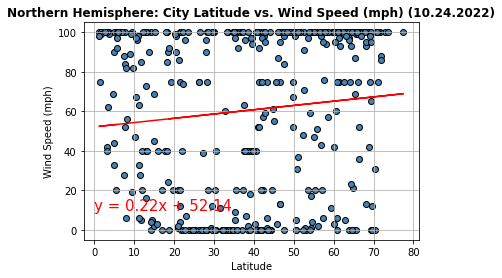

In [33]:
x_values = weather_df.loc[weather_df['Lat'] >= 0,'Lat']
y_values = weather_df.loc[weather_df["Lat"] >= 0, "Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(0,10),fontsize=15,color='red')
plt.grid()

plt.title('Northern Hemisphere: City Latitude vs. Wind Speed (mph) (10.24.2022)', fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')
plt.show()

- **From the above graph, the r-value can only explain 989 of the data. There appears to be with certaninity no correlation between Lattitude of a city and wind speed.**

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14792700802360362
 Linear Equation is : y = 0.43x + 69.15


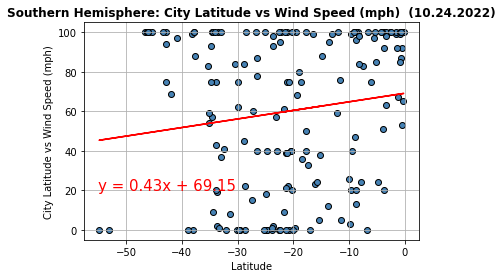

In [36]:
x_values = weather_df.loc[weather_df['Lat'] < 0,'Lat']
y_values = weather_df.loc[weather_df['Lat'] < 0, 'Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

plt.scatter(x_values,y_values, color="steelblue", edgecolors = 'black')
plt.plot(x_values,regress_values, color='r')
plt.annotate(line_eq,(-55, 20),fontsize=15,color='red')
plt.grid()

plt.title('Southern Hemisphere: City Latitude vs Wind Speed (mph)  (10.24.2022)', fontweight='bold')
plt.xlabel('Latitude')
plt.ylabel('City Latitude vs Wind Speed (mph)')
print(f'The r-value is: {rvalue}')
print(f' Linear Equation is : {line_eq}')
plt.show()

- **From the above graph, the r-value can only explain 989 of the data. There appears to be no correlation between Lattitude of a city and wind speed in the Southern Hemisphere.**